Here, I present the code to replicate statically the plot here:

[http://www.swpc.noaa.gov/products/real-time-solar-wind](http://www.swpc.noaa.gov/products/real-time-solar-wind)

In [1]:
# Step 1: Gather Data
import json, urllib.request

with urllib.request.urlopen('https://services.swpc.noaa.gov/products/solar-wind/plasma-2-hour.json') as url:
    plasmadata = json.loads(url.read().decode())
    
with urllib.request.urlopen('https://services.swpc.noaa.gov/products/solar-wind/mag-2-hour.json') as url:
    magdata = json.loads(url.read().decode())

In [2]:
# Step 2: Organize Data
Bz = [float(entry[3]) for entry in magdata[1:]]
Bt = [float(entry[6]) for entry in magdata[1:]]
density = [float(entry[1]) for entry in plasmadata[1:]]
speed = [float(entry[2]) for entry in plasmadata[1:]]
temperature = [float(entry[3]) for entry in plasmadata[1:]]

In [3]:
# Step 3: Create date lists.
import datetime

plasmadates = [datetime.datetime.strptime(row[0][:-4], '%Y-%m-%d %H:%M:%S') for row in plasmadata[1:]]
magdates = [datetime.datetime.strptime(row[0][:-4], '%Y-%m-%d %H:%M:%S') for row in magdata[1:]]

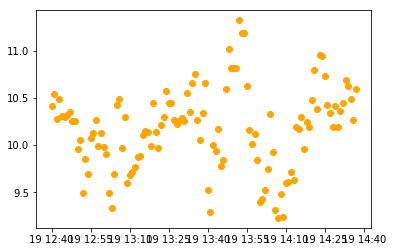

In [4]:
# Step 4: Plot one of the fields versus time.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(plasmadates, density, 'o', color='orange')

Text(0,0.5,'Temperature')

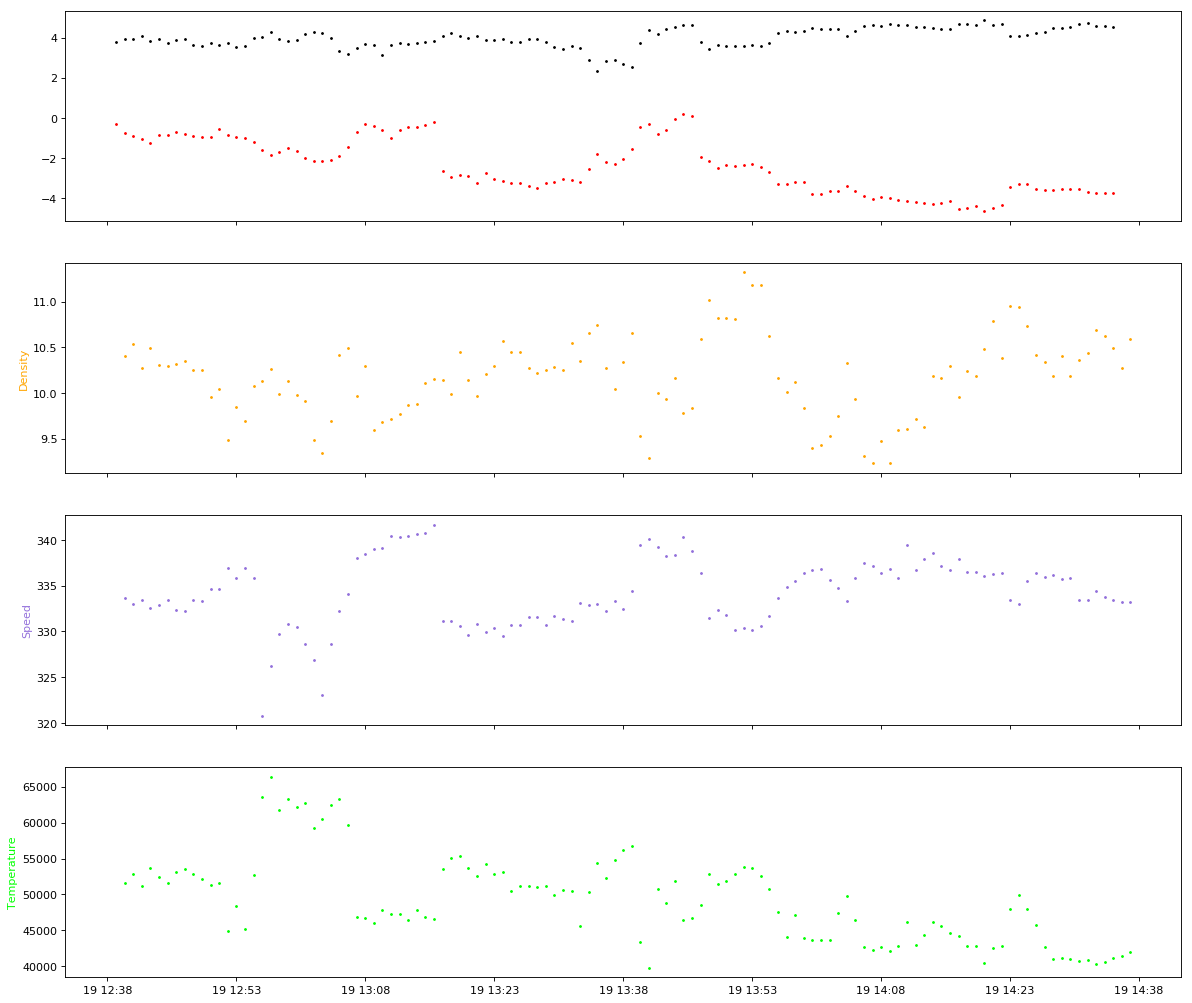

In [5]:
# Extra: Recreate webpage-like plot of values (ignoring the derived calulated field of Phi)
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k', sharex=True)

# Magnetic Field Properties
ax1.plot(magdates, Bt, 'ko', markersize=1.5)
ax1.plot(magdates, Bz, 'ro', markersize=1.5)

# Plasma Field Properties
ax2.plot(plasmadates, density, 'o', color='orange', markersize=1.5)
ax3.plot(plasmadates, speed, 'o', color='mediumpurple', markersize=1.5)
ax4.plot(plasmadates, temperature, 'o', color='lime', markersize=1.5)
ax2.set_ylabel('Density', color='orange')
ax3.set_ylabel('Speed', color='mediumpurple')
ax4.set_ylabel('Temperature', color='lime')